In [59]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [60]:
df_flood=pd.read_csv('flood_risk_dataset_india.csv')
print(df_flood.head())

    Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465433    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184   

In [61]:
print(df_flood.isnull().sum())

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64


In [62]:
print(df_flood['Land Cover'].fillna(df_flood['Land Cover'].mode()))
print(df_flood['Soil Type'].fillna(df_flood['Soil Type'].mode()))

0         Water Body
1             Forest
2       Agricultural
3             Desert
4       Agricultural
            ...     
9995    Agricultural
9996          Forest
9997          Desert
9998      Water Body
9999          Desert
Name: Land Cover, Length: 10000, dtype: object
0        Clay
1        Peat
2        Loam
3       Sandy
4        Loam
        ...  
9995     Clay
9996     Clay
9997     Clay
9998    Sandy
9999     Clay
Name: Soil Type, Length: 10000, dtype: object


In [63]:
df_flood['Soil Type'].fillna(df_flood['Soil Type'].mode()[0], inplace=True)
df_flood['Soil Type'].fillna(df_flood['Soil Type'].mode()[0], inplace=True)

df_flood['Latitude'].fillna(df_flood['Latitude'].mean(), inplace=True)
df_flood['Longitude'].fillna(df_flood['Longitude'].mean(), inplace=True)
df_flood['Rainfall (mm)'].fillna(df_flood['Rainfall (mm)'].mean(), inplace=True)
df_flood['Temperature (°C)'].fillna(df_flood['Temperature (°C)'].mean(), inplace=True)
df_flood['Humidity (%)'].fillna(df_flood['Humidity (%)'].mean(), inplace=True)
df_flood['River Discharge (m³/s)'].fillna(df_flood['River Discharge (m³/s)'].mean(), inplace=True)
df_flood['Water Level (m)'].fillna(df_flood['Water Level (m)'].mean(), inplace=True)
df_flood['Elevation (m)'].fillna(df_flood['Elevation (m)'].mean(), inplace=True)
df_flood['Land Cover'].fillna(df_flood['Land Cover'].mode()[0], inplace=True)
df_flood['Population Density'].fillna(df_flood['Population Density'].mean(), inplace=True)
df_flood['Historical Floods'].fillna(df_flood['Historical Floods'].mean(), inplace=True)
df_flood['Flood Occurred'].fillna(df_flood['Flood Occurred'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_25876\2756350457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flood['Soil Type'].fillna(df_flood['Soil Type'].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_25876\2756350457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [64]:
size_mapp_land={'Agricultural': 1, 'Desert': 2, 'Water Body': 3, 'Forest': 4, 'Urban': 5}
df_flood['Land Cover_encodeed'] = df_flood['Land Cover'].map(size_mapp_land)
size_mapp_soil={'Clay': 1, 'Loam': 2, 'Sandy': 3,'Silt': 4, 'Peat': 5}
df_flood['Soil Type_encodeed'] = df_flood['Soil Type'].map(size_mapp_soil)
print(df_flood.isnull().sum())

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
Land Cover_encodeed       0
Soil Type_encodeed        0
dtype: int64


In [65]:
# Strip leading and trailing spaces from column names
df_flood.columns = df_flood.columns.str.strip()
x = df_flood[['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)', 
			  'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Land Cover_encodeed', 
			  'Soil Type_encodeed', 'Population Density', 'Infrastructure', 'Historical Floods']]
y = df_flood['Flood Occurred']

In [66]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [67]:
y_pred=model.predict(x_test)
y_pred


array([0, 0, 1, ..., 1, 1, 0], shape=(2023,))

In [68]:
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.50914483440435


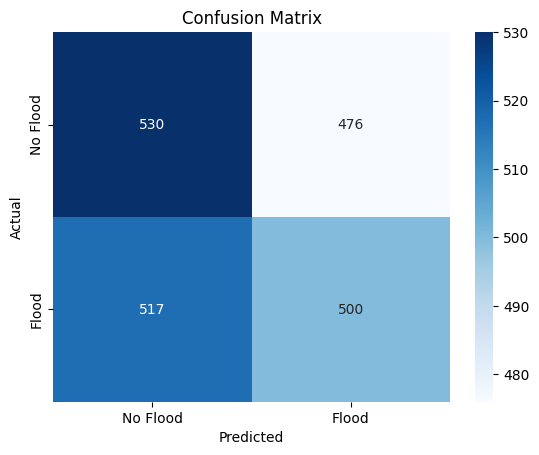

flood recall percentage : 49.16%
flood precision percentage : 51.23%
no flood recall percentage : 52.68%
no flood precision percentage : 50.62%
classification_report
              precision    recall  f1-score   support

    No Flood       0.51      0.53      0.52      1006
       Flood       0.51      0.49      0.50      1017

    accuracy                           0.51      2023
   macro avg       0.51      0.51      0.51      2023
weighted avg       0.51      0.51      0.51      2023



In [69]:
confusion=confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print(f"flood recall percentage : {(confusion[1,1]/(confusion[1,1]+confusion[1,0]))*100:.2f}%")
print(f"flood precision percentage : {(confusion[1,1]/(confusion[1,1]+confusion[0,1]))*100:.2f}%")
print(f"no flood recall percentage : {(confusion[0,0]/(confusion[0,0]+confusion[0,1]))*100:.2f}%")
print(f"no flood precision percentage : {(confusion[0,0]/(confusion[0,0]+confusion[1,0]))*100:.2f}%")
print("classification_report")
print(classification_report(y_test, y_pred, target_names=['No Flood', 'Flood']))


In [71]:
import joblib
joblib.dump(model, 'floodLogistic_model.pkl')

['floodLogistic_model.pkl']